In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

The dataset

In [4]:
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
X, y = data[:, :-1], data[:, -1].reshape(-1, 1)

In [6]:
y

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], shape=(10000, 1))

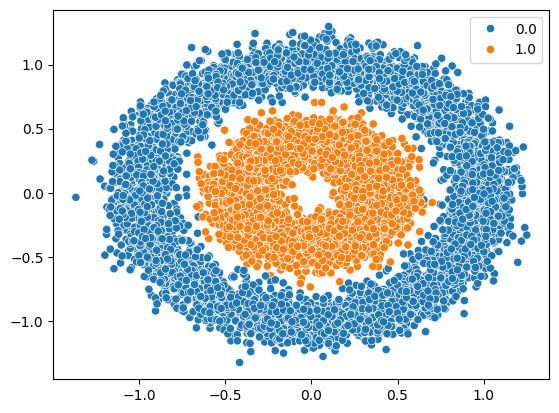

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.show()

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

 The cross entropy loss function

In [10]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)
    return cos

In [12]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h - y)) / len(y)
    return gradient

The feature trick

In [13]:
def expand_feature(x1, x2, power = 2):
    # Expand a 2D feature martix to polynomial features up to the given power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1 ** (i - j) * x2 ** j).reshape(-1, 1), axis=1)
    return new_x

In [14]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) >= 0.5).flatten()

Gradient Descent

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y)) / m
        costs.append(loss(theta, X, y))
    return theta, costs
        

Implement logistic regression

In [18]:
def logistic_regression(X, y, power=2, alpha=0.01, num_iters=100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

Decide the polynomial power in the features, and the number of iterations

In [19]:
power, num_iters = 20, 20000
predicted, theta, costs = logistic_regression(X, y, power=power, alpha=0.6, num_iters=num_iters)

C:\Users\Krishna Chaitanya\AppData\Local\Temp\ipykernel_24292\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Krishna Chaitanya\AppData\Local\Temp\ipykernel_24292\2548497659.py:3: RuntimeWarning: divide by zero encountered in log
  cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)
C:\Users\Krishna Chaitanya\AppData\Local\Temp\ipykernel_24292\2548497659.py:3: RuntimeWarning: invalid value encountered in multiply
  cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)


In [20]:
print('The accuracy is {:.2f}%'.format(sum(predicted == y.flatten()) / len(y) * 100))

The accuracy is 99.89%


Visualize the classifier

C:\Users\Krishna Chaitanya\AppData\Local\Temp\ipykernel_24292\2450876935.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)


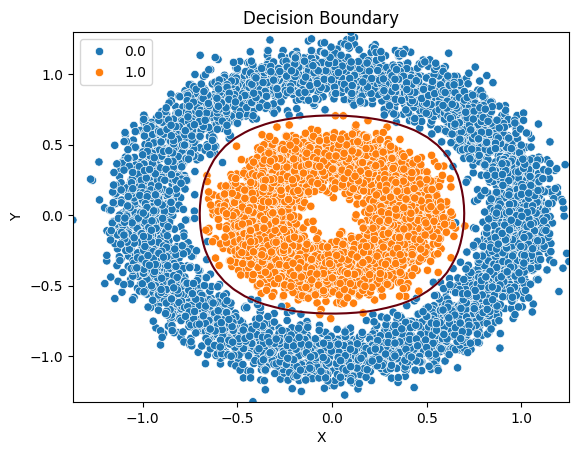

In [23]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)
z = np.transpose(z)

plt.contour(u, v, z, [0, 0.01], cmap="Reds")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Now let us look at regularization

Regularization: Cost function

In [24]:
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y) + lam * np.sum(theta1 * theta1)/len(y)
    return cos

Regularization: Gradient

In [25]:
def grad_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta1)/len(y)
    return grad


Regularization: Gradient Descent

In [26]:
def gradient_descent_reg(X, y, theta, alpha, lam=0, num_iters=100):
    m = len(y)
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()
        theta1[0] = 0
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1)/m
        costs.append(cost_reg(theta, X, y))
    return theta, costs

Regularization: Logistic Regression

In [27]:
def logistic_regression_reg(X, y, power=2, alpha=0.01, lam=0, num_iters=100):
    X = expand_feature(X[:, 0], X[:, 1], power=power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicated = predict(theta, X)
    return predicted, theta, costs

Regularization: Decide the polynomial feature, number of iterations, lambda

In [28]:
power, num_iters = 20, 20000
lam = 1
predicated, theta, costs = logistic_regression_reg(X, y, power=power, alpha=0.6, lam=lam, num_iters=num_iters)

In [30]:
print('The accuracy is {:.2f}%'.format(sum(predicted == y.flatten()) / len(y) * 100))

The accuracy is 99.89%


Regularization: Visualize results

C:\Users\Krishna Chaitanya\AppData\Local\Temp\ipykernel_24292\384193184.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1), v[j].reshape(1,-1), power=power), theta)


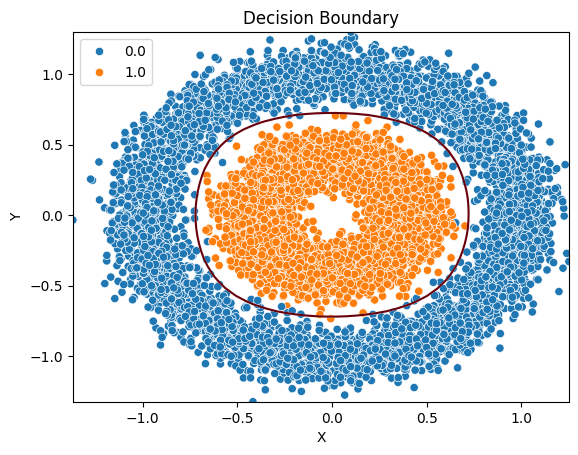

In [31]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1), v[j].reshape(1,-1), power=power), theta)
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01],cmap = "Reds")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title("Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
